# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [123]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [124]:
df = pd.read_csv('data/checker_submits.csv')

In [125]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [126]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

In [127]:
df = df[['uid', 'labname', 'numTrials', 'hour', 'dayofweek']]
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [128]:
encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df[['uid', 'labname']])
encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]], shape=(1686, 39))

In [129]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['uid', 'labname']))

In [130]:
df = pd.concat([df, encoded_df], axis=1).drop(columns=['uid', 'labname'])
df

,numTrials,hour,dayofweek,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [131]:
scaler = sklearn.preprocessing.StandardScaler()
scaled = scaler.fit_transform(df[['numTrials', 'hour']])
scaled

array([[-0.78866744, -2.5623525 ],
       [-0.75676424, -2.5623525 ],
       [-0.72486105, -2.5623525 ],
       ...,
       [-0.59724826,  0.94538241],
       [-0.56534507,  0.94538241],
       [-0.53344187,  0.94538241]], shape=(1686, 2))

In [132]:
scaled_df = pd.DataFrame(scaled, columns=['numTrials_scaled', 'hour_scaled'])
df = pd.concat(
    [df.reset_index(drop=True), scaled_df.reset_index(drop=True)],
    axis=1).drop(columns=['numTrials', 'hour'])
df

,dayofweek,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials_scaled,hour_scaled
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.533442,0.945382
1682,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.629151,0.945382
1683,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.597248,0.945382
1684,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.565345,0.945382


In [133]:
df.to_csv('data/dayofweek.csv', index=False)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayofweek         1686 non-null   int32  
 1   uid_user_1        1686 non-null   float64
 2   uid_user_10       1686 non-null   float64
 3   uid_user_11       1686 non-null   float64
 4   uid_user_12       1686 non-null   float64
 5   uid_user_13       1686 non-null   float64
 6   uid_user_14       1686 non-null   float64
 7   uid_user_15       1686 non-null   float64
 8   uid_user_16       1686 non-null   float64
 9   uid_user_17       1686 non-null   float64
 10  uid_user_18       1686 non-null   float64
 11  uid_user_19       1686 non-null   float64
 12  uid_user_2        1686 non-null   float64
 13  uid_user_20       1686 non-null   float64
 14  uid_user_21       1686 non-null   float64
 15  uid_user_22       1686 non-null   float64
 16  uid_user_23       1686 non-null   float64


In [135]:
most_popular_class = df['dayofweek'].mode()[0]
accuracy = (df['dayofweek'] == most_popular_class).mean()
print(f'Точность наивного алгоритма: {accuracy}')

Точность наивного алгоритма: 0.23487544483985764


## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [136]:
X = df.drop(columns=['dayofweek'])
y = df['dayofweek']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=21)

In [137]:
logreg = sklearn.linear_model.LogisticRegression(random_state=21, fit_intercept=False, multi_class='multinomial')
logreg.fit(X_train, y_train)

C:\Users\olegv\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(fit_intercept=False, multi_class='multinomial',
                   random_state=21)

In [138]:
y_pred = logreg.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f'Точность логистической регрессии: {accuracy}')

Точность логистической регрессии: 0.6035502958579881


In [139]:
def plot_feature_importance(coefs, feature_names, top_n=10):
    importance = np.abs(coefs).sum(axis=0)
    indices = np.argsort(importance)[-top_n:]
    plt.barh(range(len(indices)), importance[indices])
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Важность признаков')
    plt.title(f'Top-{top_n} важнейших признаков')
    plt.show()

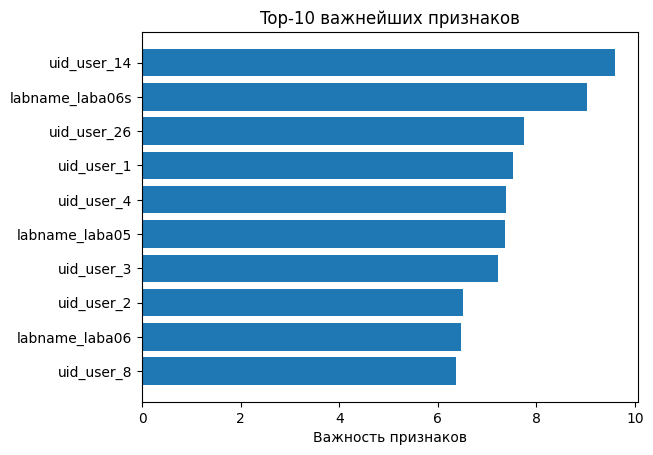

In [140]:
plot_feature_importance(logreg.coef_, X.columns, top_n=10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [141]:
svc = sklearn.svm.SVC(kernel='linear', probability=True, random_state=21)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=21)

In [142]:
y_pred_svc = svc.predict(X_test)
accuracy_svc = sklearn.metrics.accuracy_score(y_test, y_pred_svc)
print(f'Точность SVC с линейным ядром: {accuracy_svc}')

Точность SVC с линейным ядром: 0.7130177514792899


In [143]:
ovr_svc = sklearn.multiclass.OneVsRestClassifier(svc)
ovr_svc.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

In [144]:
svc_feature_importance = np.abs(ovr_svc.estimators_[0].coef_).sum(axis=0)

In [145]:
def plot_feature_importance(importances, feature_names, top_n=10):
    if len(importances.shape) > 1:
        importances = np.sum(np.abs(importances), axis=0)
    indices = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Важность признака')
    plt.ylabel('Признаки')
    plt.title(f'Топ-{top_n} значимых признаков')
    plt.show()

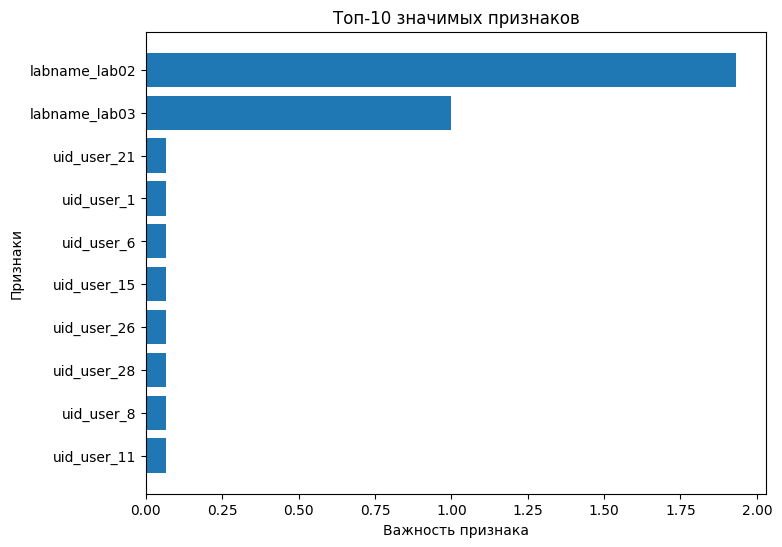

In [146]:
plot_feature_importance(svc_feature_importance, X.columns, top_n=10)

In [147]:
for kernel in ['poly', 'rbf', 'sigmoid']:
    svc = sklearn.svm.SVC(kernel=kernel, probability=True, random_state=21)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    print(f'Точность SVC с ядром "{kernel}": {accuracy}')

Точность SVC с ядром "poly": 0.849112426035503
Точность SVC с ядром "rbf": 0.8431952662721893
Точность SVC с ядром "sigmoid": 0.378698224852071


### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [148]:
dt = sklearn.tree.DecisionTreeClassifier(max_depth=4, random_state=21)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [149]:
y_pred_dt = dt.predict(X_test)
accuracy_dt = sklearn.metrics.accuracy_score(y_test, y_pred_dt)
print(f'Точность Decision Tree (глубина=4): {accuracy_dt}')

Точность Decision Tree (глубина=4): 0.5562130177514792


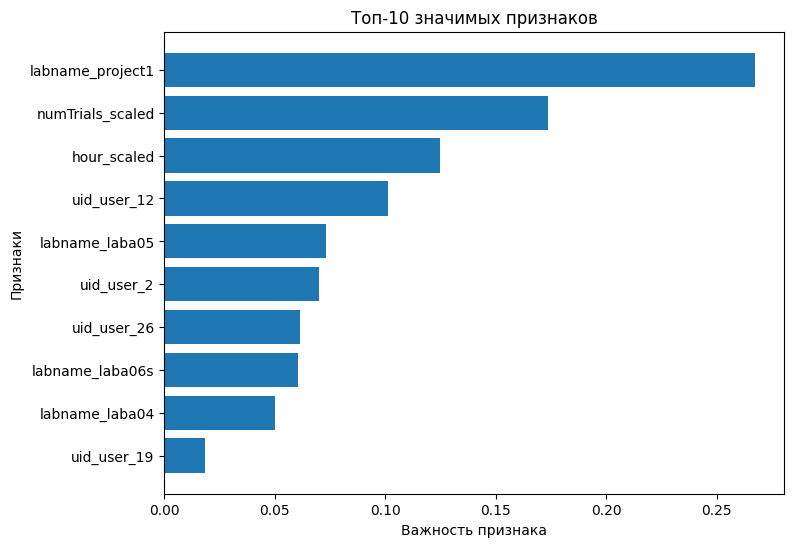

In [150]:
dt_feature_importance = dt.feature_importances_
plot_feature_importance(dt_feature_importance, X.columns, top_n=10)

In [151]:
for depth in [2, 4, 6, 8, 10]:
    dt = sklearn.tree.DecisionTreeClassifier(max_depth=depth, random_state=21)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    print(f'Точность Decision Tree (глубина={depth}): {accuracy}')

Точность Decision Tree (глубина=2): 0.5
Точность Decision Tree (глубина=4): 0.5562130177514792
Точность Decision Tree (глубина=6): 0.6834319526627219
Точность Decision Tree (глубина=8): 0.7485207100591716
Точность Decision Tree (глубина=10): 0.7485207100591716


### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [152]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, random_state=21)

In [153]:
y_pred_rf = rf.predict(X_test)
accuracy_rf = sklearn.metrics.accuracy_score(y_test, y_pred_rf)
print(f'Точность Random Forest (100 деревьев, глубина=25): {accuracy_rf:.2f}')

Точность Random Forest (100 деревьев, глубина=25): 0.95


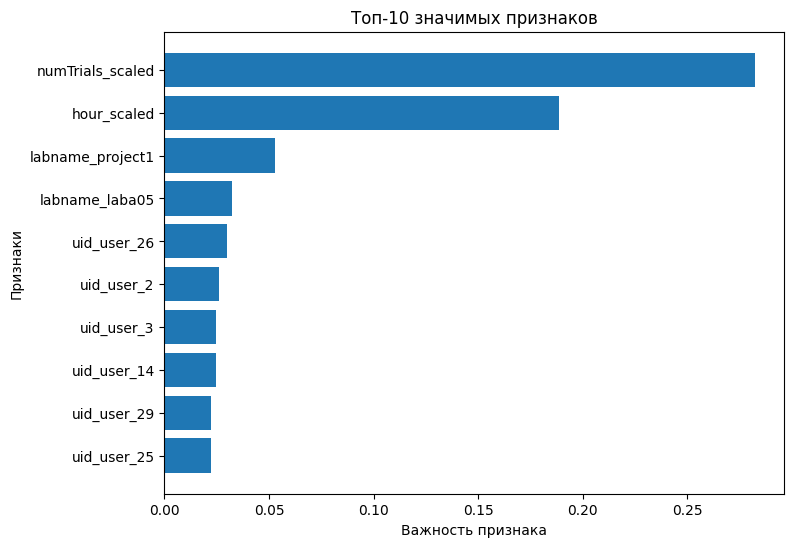

In [154]:
rf_feature_importance = rf.feature_importances_
plot_feature_importance(rf_feature_importance, X.columns, top_n=10)

In [155]:
for n_estimators in [50, 100, 200]:
    for max_depth in [10, 25, 50]:
        rf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=21)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
        print(f'Точность Random Forest (n_estimators={n_estimators}, max_depth={max_depth}): {accuracy:.2f}')

Точность Random Forest (n_estimators=50, max_depth=10): 0.88
Точность Random Forest (n_estimators=50, max_depth=25): 0.94
Точность Random Forest (n_estimators=50, max_depth=50): 0.94
Точность Random Forest (n_estimators=100, max_depth=10): 0.87
Точность Random Forest (n_estimators=100, max_depth=25): 0.95
Точность Random Forest (n_estimators=100, max_depth=50): 0.95
Точность Random Forest (n_estimators=200, max_depth=10): 0.88
Точность Random Forest (n_estimators=200, max_depth=25): 0.94
Точность Random Forest (n_estimators=200, max_depth=50): 0.94
